In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import  FuncFormatter
import yfinance as yf #importing Yahoo Finance Liberary
from datetime import date, timedelta

import warnings
warnings.filterwarnings("ignore")

### Fetching data from yfinance

In [117]:
# define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=3687)).strftime("%Y-%m-%d")

tickers = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "META", "NVDA"
]

df_original = yf.download(tickers, start=start_date, end=end_date, progress=False)

df_original.reset_index(inplace=True)

df_original.head()

Price        Date      Close                                            \
Ticker                  AAPL     AMZN      GOOGL       META       MSFT   
0      2015-01-02  24.347174  15.4260  26.381865  78.151466  40.152489   
1      2015-01-05  23.661274  15.1095  25.879185  76.896263  39.783245   
2      2015-01-06  23.663498  14.7645  25.240501  75.860214  39.199341   
3      2015-01-07  23.995319  14.9210  25.166271  75.860214  39.697365   
4      2015-01-08  24.917267  15.0230  25.253954  77.882492  40.865204   

Price                  High                      ...       Open             \
Ticker      NVDA       AAPL     AMZN      GOOGL  ...      GOOGL       META   
0       0.483144  24.817059  15.7375  26.693236  ...  26.533812  78.280977   
1       0.474983  24.195741  15.4190  26.304145  ...  26.262296  77.683258   
2       0.460582  23.924050  15.1500  25.966369  ...  25.930997  76.936106   
3       0.459382  24.095531  15.0640  25.482126  ...  25.455225  76.467893   
4       0.476663  24.975168  15.1570  25.283346  ...  24.984929  76.447969   

Price                           Volume                                \
Ticker       MSFT      NVDA       AAPL      AMZN     GOOGL      META   
0       40.066621  0.483144  212818400  55664000  26480000  18177500   
1       39.817590  0.483144  257142000  55484000  41182000  26452200   
2       39.826186  0.475703  263188400  70380000  54456000  27399300   
3       39.482692  0.463942  160423600  52806000  46918000  22045300   
4       40.143902  0.464663  237458000  61768000  73054000  23961000   

Price                        
Ticker      MSFT       NVDA  
0       27913900  113680000  
1       39673900  197952000  
2       36447900  197764000  
3       29114100  321808000  
4       29645200  283780000  

[5 rows x 31 columns]

### Preparing the dataset for further analysis

In [118]:
#list(df_original.columns)

In [119]:
#Create a list of columns to melt
columns_to_melt = [('Close', 'AAPL'), ('Close', 'AMZN'), ('Close', 'GOOGL'), ('Close', 'META'), ('Close', 'MSFT'),
 ('Close', 'NVDA'), ('High', 'AAPL'), ('High', 'AMZN'), ('High', 'GOOGL'), ('High', 'META'), ('High', 'MSFT'),
 ('High', 'NVDA'), ('Low', 'AAPL'), ('Low', 'AMZN'), ('Low', 'GOOGL'), ('Low', 'META'), ('Low', 'MSFT'),
 ('Low', 'NVDA'), ('Open', 'AAPL'), ('Open', 'AMZN'), ('Open', 'GOOGL'), ('Open', 'META'), ('Open', 'MSFT'), ('Open', 'NVDA'),
 ('Volume', 'AAPL'), ('Volume', 'AMZN'), ('Volume', 'GOOGL'), ('Volume', 'META'), ('Volume', 'MSFT'), ('Volume', 'NVDA')
]

# Create an empty DataFrame to store the melted data
new_df = pd.DataFrame()

# Iterate through the columns and append to the melted DataFrame
for col in columns_to_melt:
    temp_df = df_original[[('Date', ''), col]].copy()
    temp_df.columns = ['Date', 'Value']
    temp_df['Price'] = col[0]
    temp_df['Ticker'] = col[1]
    new_df = pd.concat([new_df, temp_df], ignore_index=True)

new_df.head()

,Date,Value,Price,Ticker
0,2015-01-02,24.347174,Close,AAPL
1,2015-01-05,23.661274,Close,AAPL
2,2015-01-06,23.663498,Close,AAPL
3,2015-01-07,23.995319,Close,AAPL
4,2015-01-08,24.917267,Close,AAPL


In [120]:
# Pivotted DataFrame
df_reshaped = new_df.pivot_table(index=['Date', 'Ticker'], columns='Price', values='Value', aggfunc='first').reset_index()
df_reshaped.head()

Price,Date,Ticker,Close,High,Low,Open,Volume
0,2015-01-02,AAPL,24.347174,24.817059,23.906238,24.805924,212818400.0
1,2015-01-02,AMZN,15.426000,15.737500,15.348000,15.629000,55664000.0
2,2015-01-02,GOOGL,26.381865,26.693236,26.298664,26.533812,26480000.0
3,2015-01-02,META,78.151466,78.629643,77.404320,78.280977,18177500.0
4,2015-01-02,MSFT,40.152489,40.719226,39.963578,40.066621,27913900.0


In [121]:
df_reshaped['Year'] = df_reshaped['Date'].dt.year # Extracting Year column form Date column
df_reshaped['Month'] = df_reshaped['Date'].dt.month # Extracting Month column from Date column

# Mapping dictionary for ticker to company name
ticker_to_company = {
    'AAPL': 'Apple',
    'AMZN': 'Amazon',
    'GOOGL': 'Google',
    'META': 'Meta Platforms',
    'MSFT': 'Microsoft',
    'NVDA': 'NVIDIA'
}
# Mapping dictionary for month number  to month name
month_to_month_name = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
df_reshaped['Month Name'] = df_reshaped['Month'].map(month_to_month_name)
df_reshaped['Company'] = df_reshaped['Ticker'].map(ticker_to_company)

df = df_reshaped[['Date','Ticker', 'Company', 'Close', 'High', 'Low', 'Open', 'Volume', 'Year', 'Month Name', 'Month']]

df.head()

Price,Date,Ticker,Company,Close,High,Low,Open,Volume,Year,Month Name,Month
0,2015-01-02,AAPL,Apple,24.347174,24.817059,23.906238,24.805924,212818400.0,2015,Jan,1
1,2015-01-02,AMZN,Amazon,15.426000,15.737500,15.348000,15.629000,55664000.0,2015,Jan,1
2,2015-01-02,GOOGL,Google,26.381865,26.693236,26.298664,26.533812,26480000.0,2015,Jan,1
3,2015-01-02,META,Meta Platforms,78.151466,78.629643,77.404320,78.280977,18177500.0,2015,Jan,1
4,2015-01-02,MSFT,Microsoft,40.152489,40.719226,39.963578,40.066621,27913900.0,2015,Jan,1


In [122]:
# save the data to csv file
df_save = df.to_csv('stock_analysis.csv')

In [123]:
Ticker_prices = df.groupby('Company')[['Close', 'Volume']].mean().reset_index()

ticker_prices = Ticker_prices.sort_values(by='Close', ascending=False)

ticker_prices

Price,Company,Close,Volume
3,Meta Platforms,224.919994,2.282444e+07
4,Microsoft,184.040083,2.883271e+07
0,Amazon,102.286240,7.578681e+07
1,Apple,95.442205,1.166194e+08
2,Google,83.372676,3.509152e+07
5,NVIDIA,21.734074,4.662680e+08


### Descriptive Statistics

In [178]:
# 2. Descriptive Statistics
desc_stats = df.groupby('Company').agg(
    Avg_Close=('Close', 'mean'),
    Avg_Volume=('Volume', 'mean'),
    Start_Price=('Close', 'first'),
    End_Price=('Close', 'last')
).reset_index()

desc_stats['Cumulative_Return'] = ((desc_stats['End_Price'] - desc_stats['Start_Price']) / desc_stats['Start_Price']) * 100

desc_stats

,Company,Avg_Close,Avg_Volume,Start_Price,End_Price,Cumulative_Return
0,Amazon,102.286240,7.578681e+07,15.426000,237.419998,1439.089872
1,Apple,95.442205,1.166194e+08,24.347174,228.009995,836.494714
2,Google,83.372676,3.509152e+07,26.381865,201.229996,662.758809
3,Meta Platforms,224.919994,2.282444e+07,78.151466,697.460022,792.446494
4,Microsoft,184.040083,2.883271e+07,40.152489,410.920013,923.398615
5,NVIDIA,21.734074,4.662680e+08,0.483144,116.660004,24046.029666


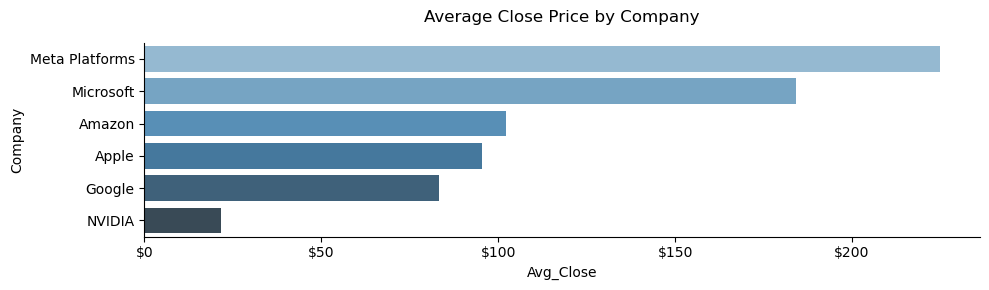

In [ ]:

avg_close = desc_stats.sort_values(by='Avg_Close', ascending=False).copy()

plt.figure(figsize=(10, 3))

sns.barplot(data=avg_close,
            x='Avg_Close',
            y='Company',
            palette='Blues_d',
           )


def curruncy_formatter(x, pos):
    if x >= 1e6:
        return f"${x / 1e6:.0f}M"
    else:
        return f"${x:.0f}"
    
# Format x-axis tick labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(curruncy_formatter))

plt.title('Average Close Price by Company', pad=15)

sns.despine()
plt.tight_layout()
plt.show()

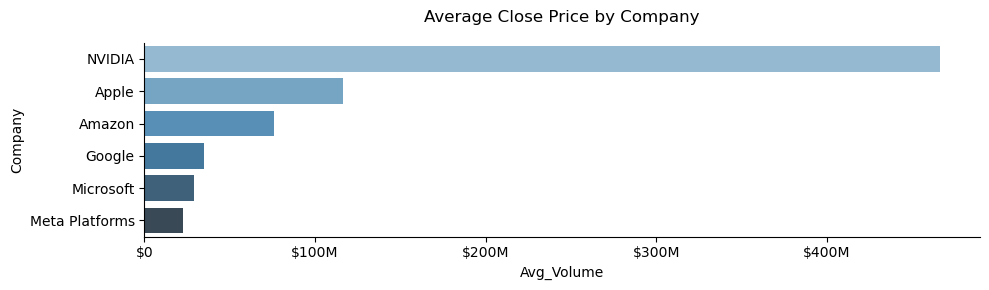

In [196]:

avg_volume = desc_stats.sort_values(by='Avg_Volume', ascending=False).copy()

plt.figure(figsize=(10, 3))
sns.barplot(data=avg_volume,
            x='Avg_Volume',
            y='Company',
            palette='Blues_d',
           )
def curruncy_formatter(x, pos):
    if x >= 1e6:
        return f"${x / 1e6:.0f}M"
    else:
        return f"${x:.0f}"
    
# Format x-axis tick labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(curruncy_formatter))

  
plt.title('Average Close Price by Company', pad=15)

sns.despine()
plt.tight_layout()
plt.show() 